In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
from random import random

In [2]:
def calc_pi_quick(num_attempts: int):

    inside = 0

    for _ in range(num_attempts):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            inside += 1

    return 4*inside/num_attempts

In [3]:
def calc_pi(num_attempts, display_plot=False):

    import matplotlib
    import matplotlib.pyplot as plt
    from random import random
    
    inside = 0

    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(num_attempts):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            inside += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    pi = 4*inside/num_attempts
    
    if display_plot:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.scatter(x_inside, y_inside, color='g')
        ax.scatter(x_outside, y_outside, color='r')

    return pi

In [4]:
def calc_pi_numpi_bad(num_attempts, display_plot=False):
    
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    from random import random
    
    inside = 0

    x_inside = np.array([])
    y_inside = np.array([])
    x_outside = np.array([])
    y_outside = np.array([])

    for _ in range(num_attempts):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            inside += 1
            x_inside = np.append(x_inside, x)
            y_inside = np.append(y_inside, y)
        else:
            x_outside = np.append(x_outside, x)
            y_outside = np.append(y_outside, y)

    if display_plot:        
            
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.scatter(np.ma.masked_equal(x_inside,0), np.ma.masked_equal(y_inside,0), color='g')
        ax.scatter(np.ma.masked_equal(x_outside,0), np.ma.masked_equal(y_outside,0), color='r')
            
    pi = 4*inside/num_attempts

    return pi

In [5]:
calc_pi_numpi_bad(50000)

3.13424

calc_pi with plotly display time: 0:00:07.962624
calc_pi no display time: 0:00:00.651350
calc_pi_quick time: 0:00:00.470428


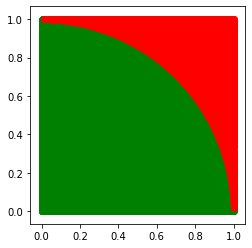

In [6]:
from timeit import default_timer as timer
from datetime import timedelta

start = timer()
calc_pi(500_000, True)
end = timer()
print('calc_pi with plotly display time: {}'.format(timedelta(seconds=end-start)))

start = timer()
calc_pi(500_000, False)
end = timer()
print('calc_pi no display time: {}'.format(timedelta(seconds=end-start)))

start = timer()
calc_pi_quick(500_000)
end = timer()
print('calc_pi_quick time: {}'.format(timedelta(seconds=end-start)))

In [7]:
def calc_pi_numpi(num_attempts, display_plot=False, display_masked_plot=False):
    
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    from random import random
    
    inside = 0

    x_inside = np.zeros(num_attempts)
    y_inside = np.zeros(num_attempts)
    x_outside = np.zeros(num_attempts)
    y_outside = np.zeros(num_attempts)

    for i in range(num_attempts):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            inside += 1
            x_inside[i] = x
            y_inside[i] = y
        else:
            x_outside[i] = x
            y_outside[i] = y

    if display_masked_plot:
        
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.scatter(np.ma.masked_equal(x_inside,0), np.ma.masked_equal(y_inside,0), color='g')
        ax.scatter(np.ma.masked_equal(x_outside,0), np.ma.masked_equal(y_outside,0), color='r')
        
    if display_plot:
            
        x_inside2 = x_inside[x_inside !=0] 
        y_inside2 = y_inside[y_inside !=0]
        x_outside2 = x_outside[x_outside !=0]
        y_outside2 = y_outside[y_outside !=0]

        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.scatter(x_inside2, y_inside2, color='g')
        ax.scatter(x_outside2, y_outside2, color='r')

    pi = 4*inside/num_attempts

    return pi

3.1875

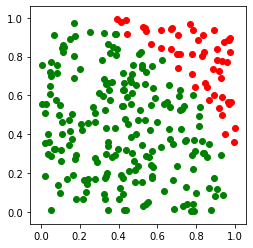

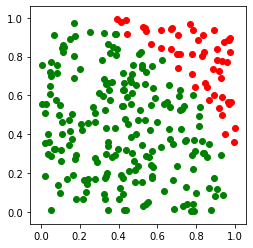

In [8]:
calc_pi_numpi(256, True, True)

calc_pi normal display time: 0:00:02.356088
calc_pi masked display time: 0:00:03.936365
calc_pi no display time: 0:00:00.648878


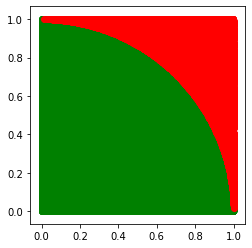

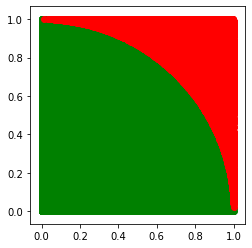

In [9]:
start = timer()
calc_pi_numpi(500000, True, False)
end = timer()
time_taken = end-start
print('calc_pi normal display time: {}'.format(timedelta(seconds=time_taken)))

start = timer()
calc_pi_numpi(500000, False, True)
end = timer()
time_taken = end-start
print('calc_pi masked display time: {}'.format(timedelta(seconds=time_taken)))


start = timer()
calc_pi_numpi(500_000, False, False)
end = timer()
time_taken = end-start
print('calc_pi no display time: {}'.format(timedelta(seconds=time_taken)))


In [10]:
start = timer()
calc_pi_numpi(500_000, False, False)
end = timer()
time_taken = end-start
print('calc_pi no display time: {}'.format(timedelta(seconds=time_taken)))

start = timer()
calc_pi(500_000)
end = timer()
time_taken = end-start
print('calc_pi no display time: {}'.format(timedelta(seconds=time_taken)))

calc_pi no display time: 0:00:00.654359
calc_pi no display time: 0:00:00.647003


In [11]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

In [12]:

def measure_performance(num_attempts: int) -> None:

    from timeit import default_timer as timer
    from datetime import timedelta
    
    funcs_to_call = [calc_pi, calc_pi_quick, calc_pi_numpi, calc_pi_numpi_bad]
    
    for func in funcs_to_call:
        start = timer()
        func(num_attempts)
        end = timer()
        time_taken = end-start
        print('{} time: {}'.format(func.__name__, timedelta(seconds=time_taken)))
    
measure_performance(50000)


calc_pi time: 0:00:00.058524
calc_pi_quick time: 0:00:00.045797
calc_pi_numpi time: 0:00:00.063515
calc_pi_numpi_bad time: 0:00:02.702623


In [13]:
def measure_performance_verbose(num_attempts: int) -> None:

    from timeit import default_timer as timer
    from datetime import timedelta

    start = timer()
    calc_pi(num_attempts, False)
    end = timer()
    time_taken = end-start
    print('calc_pi time: {}'.format(timedelta(seconds=time_taken)))

    start = timer()
    calc_pi_quick(num_attempts)
    end = timer()
    quick_time_taken = end-start
    print('calc_pi_quick time: {}'.format(timedelta(seconds=quick_time_taken)))

    percentage_improvement = quick_time_taken / time_taken * 100
    
    print('Precentage improvement: {}'.format(percentage_improvement))

    start = timer()
    calc_pi_numpi(num_attempts)
    end = timer()
    numpi_time_taken = end-start
    print('calc_pi_numpi time: {}'.format(timedelta(seconds=numpi_time_taken)))
    
    start = timer()
    calc_pi_numpi_bad(num_attempts)
    end = timer()
    numpi_bad_time_taken = end-start
    print('calc_pi_numpi_bad time: {}'.format(timedelta(seconds=numpi_bad_time_taken)))
    
    
measure_performance_verbose(500000)

calc_pi time: 0:00:00.655109
calc_pi_quick time: 0:00:00.483644
Precentage improvement: 73.8265089769732
calc_pi_numpi time: 0:00:00.675130
calc_pi_numpi_bad time: 0:11:03.702361


In [14]:
# lets plot out how bad this is getting as we increase the steps




Attempting Monte Carlo Simulation with 50 attempts. Pi: 3.12 
Attempting Monte Carlo Simulation with 500 attempts. Pi: 3.192 
Attempting Monte Carlo Simulation with 5000 attempts. Pi: 3.1704 
Attempting Monte Carlo Simulation with 50000 attempts. Pi: 3.1476 
Real PI: 3.141592653589793


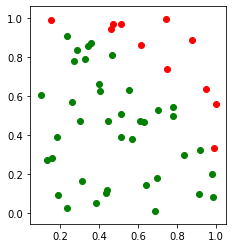

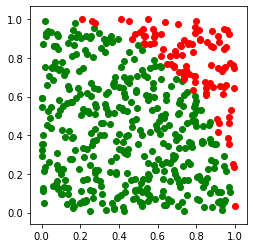

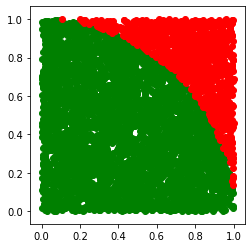

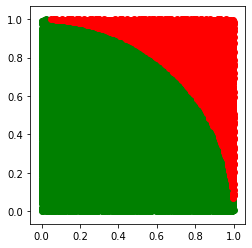

In [15]:


print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(50, calc_pi(50, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(500, calc_pi(500, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(5_000, calc_pi(5_000, True)))
print('Attempting Monte Carlo Simulation with {} attempts. Pi: {} '.format(50_000, calc_pi(50_000, True)))

print('Real PI: {}'.format(math.pi))



In [16]:
def plot_attempt_pi_MC_n_times(num_times, mc_attempts):

    # ok, lets use this function to try to see what the drift between that and Pi is.
    import matplotlib.pyplot as plt
    import statistics

    pi_vals = []

    for i in range(num_times):
        pi = calc_pi(mc_attempts)
        pi_vals.append(pi)

    attempt = list(range(1, num_times + 1))
    actual_pi = [math.pi]*num_times

    plt.plot(attempt, pi_vals)
    plt.plot(attempt, actual_pi)
    # a really simple arithmetic way of getting pretty close
    plt.plot(attempt, [22/7]*num_times)
    avg = statistics.mean(pi_vals)
    
    plt.plot(attempt, [avg]*num_times)
    print('Avg: {}. Diff to actual Pi: {}'.format(avg, abs(math.pi - avg)))
    plt.show()
    return pi_vals

    

calc_pi(5000): 3.1456. Diff to actual Pi: 0.004007346410206836
Avg: 3.156. Diff to actual Pi: 0.014407346410207023


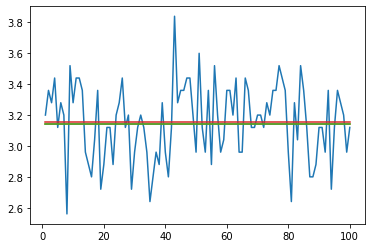

calc_pi(50_000): 3.14216. Diff to actual Pi: 0.0005673464102069481
Avg: 3.1336. Diff to actual Pi: 0.007992653589793175


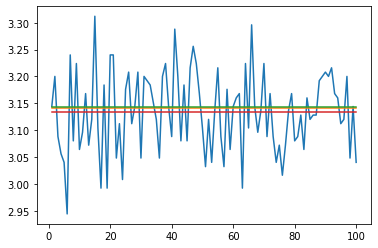

calc_pi(500_000): 3.144432. Diff to actual Pi: 0.002839346410207
Avg: 3.140928. Diff to actual Pi: 0.0006646535897929517


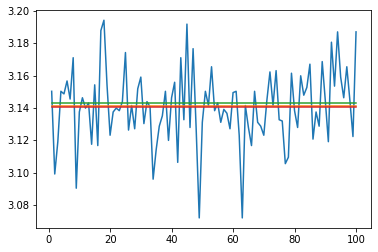

calc_pi((5_000_000): 3.1418072. Diff to actual Pi: 0.00021454641020701715
Avg: 3.1411104. Diff to actual Pi: 0.0004822535897930358


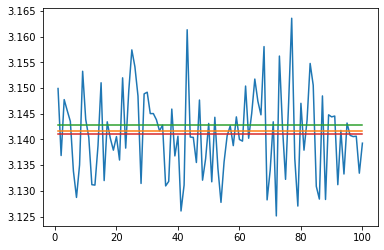

In [17]:

mc_pi = calc_pi(5000)
print('calc_pi(5000): {}. Diff to actual Pi: {}'.format(mc_pi, abs(math.pi - mc_pi)))
w = plot_attempt_pi_MC_n_times(100, 50)

mc_pi = calc_pi(50_000)
print('calc_pi(50_000): {}. Diff to actual Pi: {}'.format(mc_pi, abs(math.pi - mc_pi)))
x = plot_attempt_pi_MC_n_times(100, 500)

mc_pi = calc_pi(500_000)
print('calc_pi(500_000): {}. Diff to actual Pi: {}'.format(mc_pi, abs(math.pi - mc_pi)))
y = plot_attempt_pi_MC_n_times(100, 5_000)

mc_pi = calc_pi(5_000_000)
print('calc_pi((5_000_000): {}. Diff to actual Pi: {}'.format(mc_pi, abs(math.pi - mc_pi)))
z = plot_attempt_pi_MC_n_times(100, 50_000)
